<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H3/H3%20-%20Mateo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Influenza H1N1 2009 Pandemic in Sweden
During the fall of 2009 there was a large pandemic of the H1N1-virus, commonly known as the swine-flu. During this pandemic it is estimated that about 1.5 million people in Sweden were infected. As an attempt to stop the pandemic and reduce excess mortality the government issued a vaccination program beginning in week 40 of 2009. During the weeks that followed they vaccinated more than 60% of the Swedish population.

In this homework, you will simulate the pandemic with the goal of learning the network-structure characteristics and disease-dynamics parameters of the pandemic in Sweden 2009. This task will be divided into 4 parts where the focus of each part is to:
1. Get started and learn how to:

    a. Simulate a pandemic on a known graph

    b. Generate a random graph
2. Simulate the disease propagation on a random graph without vaccination
3. Simulate disease propagation on a random graph with vaccination
4. Estimate the network-structure characteristics and disease-dynamics parameters for the pandemic in Sweden during the fall of 2009

All numbers regarding the H1N1 pandemic in Sweden during the fall of 2009 have been taken from the a report by the Swedish Civil Contingencies Agency (Myndigheten for samhallsskydd och beredskap, MSB) and the Swedish Institute for Communicable Disease Control (Smittskyddsinstitutet, SMI).

## 1.1 Preliminary parts
As a warm-up exercise we will start off by doing two preliminary parts. The first one will involve simulating an epidemic on a given graph, while the second part will be to generate a random graph with preferential attachment.

### 1.1.1 Epidemic on a known graph
In this part you will simulate an epidemic on a symmetric k-regular undirected graph with node set $V=\left\{1,2,...,n\right\}$ where every node is directly connected to the $k=6$ nodes whose index is closest to their own modulo $n$. See Figure 1 for an example with 8 nodes. The graph that you will simulate the epidemic on will however contain $n=500$ nodes.
<figure>
    <img width="256" src="https://raw.githubusercontent.com/MateoRivera/network-dynamics/main/H3/sources/F1.png"/>
    <figcaption>Figure 1: Symmetric $k$-regular graph.</figcaption>
</figure>
The disease propagation model that you will use to simulate the epidemic is a discrete-time simplified version of the SIR epidemic model. At any time $t=0,1,...$ nodes are in state $X_{i}\left(t\right) \in\left\{S,I,R \right\}$, where $S$ is susceptible, $I$ is infected and $R$ is recovered. Let $\beta \in \left[0,1\right]$ be the probability that the infection is spread from an infected individual to a susceptible one (given that they are connected by a link) during one time step. Assuming that a susceptible node $i$ has $m$ infected neighbors, this means that the probability that individual $i$ does not get infected by any of the neighbors during one time step is $\left(1-\beta \right)^{m}$. Thus, the probability that individual $i$ becomes infected by any of its neighbors is $1-\left(1-\beta \right)^{m}$. Furthermore, let $\rho \in \left[0,1\right]$ be the probability that an infected individual will recover during one time step. The epidemic is driven by the following transition probabilities
$$ \mathbb{P}\left(X_{i}\left(t+1 \right) =I \mid X_{i} \left( t\right) = S, \sum_{j\in V}W_{ij}\delta_{X_{j}\left(t\right)}^{I}=m \right) = 1-\left(1-\beta \right)^{m}$$
$$\mathbb{P}\left(X_{i}\left(t+1 \right) =R \mid X_{i} \left( t\right) = I \right)=\rho$$
where $\sum_{j\in V}W_{ij}\delta_{X_{j}\left(t\right)}^{I}$ is the number of infected neighbors for node $i$.

**Problem 1.1:** You should simulate an epidemic on a symmetric $k-$regular graph $G=\left(V, E\right)$ with $\left|V\right|=500$ nodes and $k=6$. See Figure 1 for an example with $n=8$ nodes and $k=6$. Let $\beta=0.25$ and $\rho=0.6$. With one week being one unit of time, simulate the epidemic for 15 weeks. You can choose an initial configuration with 10 infected nodes selected at a random from the node set $V$, or make a different choice of initial configuration (In the latter case, please briefly discuss your motivation).

Do this $N=100$ times and plot the following:
* The average number of newly infected individuals each week. In other words, you should plot how many people *become* infected each week (On the average).
* The average total number of susceptible, infected, and recovered individuals at each week. In other words, you should plot how many individuals *in total are* susceptible/infected/recovered at each week (On the average).

**Hint:** Since we use a fairly large amount of nodes for this simulation it is good idea to use *sparse matrices* for this and the following problems.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from numpy.random import choice, rand
%matplotlib inline
options = {
    'node_size': 500,
    'width': 1, # width of the edges,
    'node_color': '#ffffff',
    'node_shape': 'o',
    'edge_color': 'black',
    'font_weight':'normal'
}
import progressbar
import time

In [37]:
def custom_circulant_graph(n, k):
    #if condition returns False, AssertionError is raised:
    assert k % 2 == 0, "k must be even, i.e. k ∈ {2i | i ∈ N}"

    # Generate the circulant graph
    distances = [i for i in range(1, k // 2 + 1)]  # Set of distances (1, 2, ..., k/2)
    return nx.circulant_graph(n, distances)

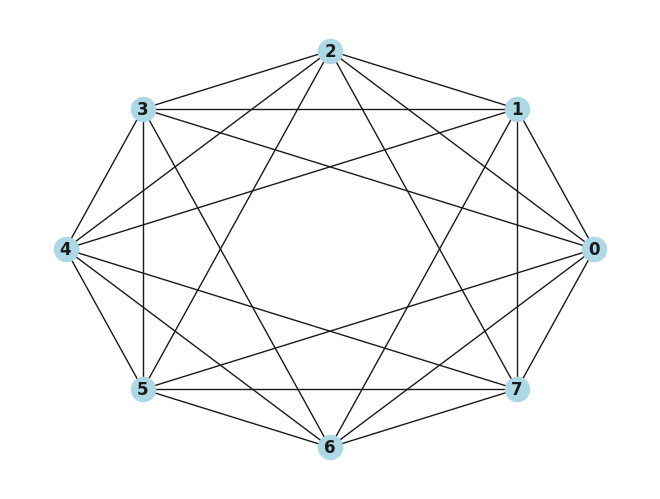

In [38]:
n = 8
k = 6
G = custom_circulant_graph(n, k)
nx.draw_circular(G, with_labels=True, font_weight='bold', node_color='lightblue')